Mijozning noroziligni o'rganish va mijozni saqlab qolish bo'yicha loyiha


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics


In [62]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Dataset 20 ta ustundan iborat. Har bir ustun nimani anglatishi yuqoridagi Excel faylning boshqa sahifasida saqlangan. Keling uni ham ko'raylik:

In [9]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [10]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [13]:
df.Churn.value_counts()

0    4682
1     948
Name: Churn, dtype: int64

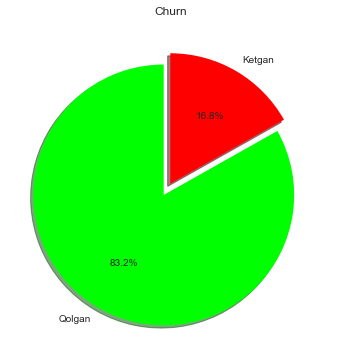

In [34]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
plt.pie(df.Churn.value_counts(), labels=['Qolgan','Ketgan'], autopct="%1.1f%%", shadow=True, startangle=90, explode=[0.1,0], colors=['#00ff00','#ff0000'])
plt.title("Churn")
plt.show()

In [36]:
df.corrwith(df.Churn).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

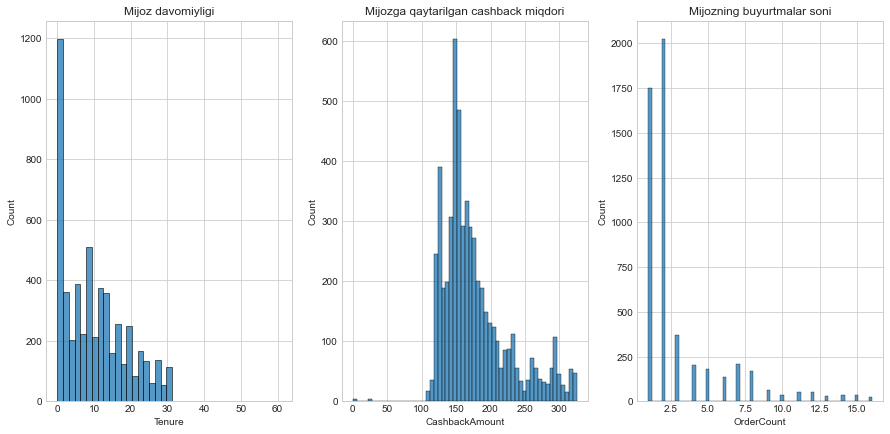

In [43]:
fig, axes = plt.subplots(1,3,figsize=(15,7))
sns.histplot(x='Tenure', data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")
sns.histplot(x='CashbackAmount', data=df, ax=axes[1])
axes[1].set_title("Mijozga qaytarilgan cashback miqdori")
sns.histplot(x='OrderCount', data=df, ax=axes[2])
axes[2].set_title("Mijozning buyurtmalar soni")
plt.show()

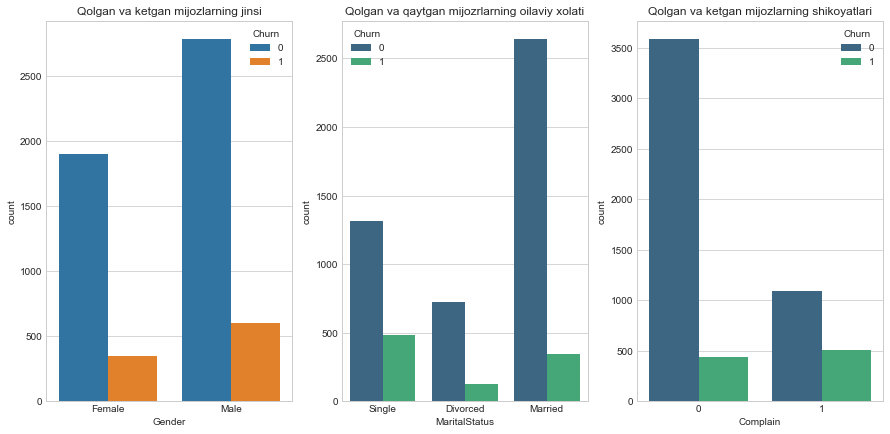

In [53]:
fig, axes = plt.subplots(1,3,figsize=(15,7))
sns.countplot(x='Gender', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Qolgan va ketgan mijozlarning jinsi')

sns.countplot(x='MaritalStatus', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Qolgan va qaytgan mijozrlarning oilaviy xolati')

sns.countplot(x='Complain', hue='Churn', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Qolgan va ketgan mijozlarning shikoyatlari')
plt.show()

In [55]:
df.isnull().sum()/len(df)*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [56]:
df.corrwith(df.Churn).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [63]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [65]:
data.isnull().sum()/len(df)*100

Churn                0.000000
Tenure               4.689165
Complain             0.000000
DaySinceLastOrder    5.452931
CashbackAmount       0.000000
MaritalStatus        0.000000
Gender               0.000000
dtype: float64

In [66]:
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 571
Mavjud bo'lmagan qatorlar soni: 571
Mavjud bo'lmagan qatorlar %: 10.0%


In [67]:
data = data.dropna()
data.shape

(5059, 7)

In [68]:
data['Churn'].value_counts()/len(data)

0    0.839296
1    0.160704
Name: Churn, dtype: float64

In [70]:
data.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus,Gender
0,1,4.0,1,5.0,159.93,Single,Female
3,1,0.0,0,3.0,134.07,Single,Male
4,1,0.0,0,3.0,129.60,Single,Male
5,1,0.0,1,7.0,139.19,Single,Female
8,1,13.0,1,2.0,126.83,Divorced,Male


ML ga tayyorgarlik

In [72]:
encoded = pd.get_dummies(data)

In [73]:
X = encoded.drop(['Churn'], axis=1)
y = encoded['Churn']

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [134]:
X_train,X_tets, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [135]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [136]:
y_pred = LR_model.predict(X_tets)

Modelni baholaymiz

Logistic Regression modeli uzrening qiymatlari: 0.8616600790513834


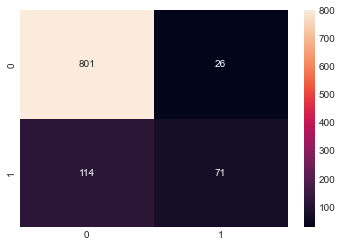

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       827
           1       0.73      0.38      0.50       185

    accuracy                           0.86      1012
   macro avg       0.80      0.68      0.71      1012
weighted avg       0.85      0.86      0.84      1012



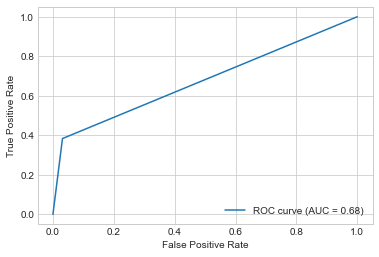

In [137]:
print(f"Logistic Regression modeli uzrening qiymatlari: {metrics.accuracy_score(y_test, y_pred)}")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

print(f"Classification report: \n{metrics.classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Support vector Machine

In [138]:
# Support Vector Machine
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_tets)

Super vector Machine Regression modeli uzrening qiymatlari: 0.8547430830039525


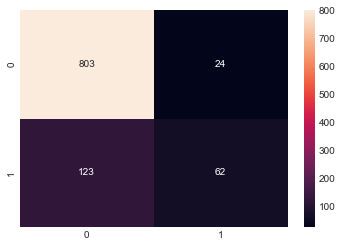

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       827
           1       0.72      0.34      0.46       185

    accuracy                           0.85      1012
   macro avg       0.79      0.65      0.69      1012
weighted avg       0.84      0.85      0.83      1012



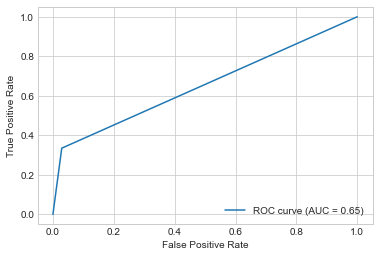

In [139]:
print(f"Super vector Machine Regression modeli uzrening qiymatlari: {metrics.accuracy_score(y_test, y_pred)}")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

print(f"Classification report: \n{metrics.classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [140]:
# Decision Tree
DT_model = DecisionTreeClassifier(min_samples_leaf=1, max_depth=20)
DT_model.fit(X_train, y_train)

y_pred = DT_model.predict(X_tets)

Decision Tree Regression modeli uzrening qiymatlari: 0.9466403162055336


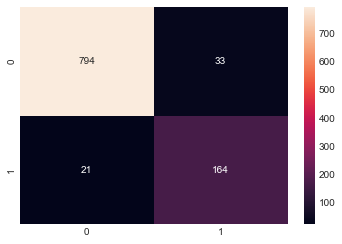

Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       827
           1       0.83      0.89      0.86       185

    accuracy                           0.95      1012
   macro avg       0.90      0.92      0.91      1012
weighted avg       0.95      0.95      0.95      1012



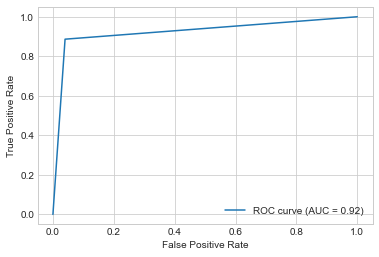

In [141]:
print(f"Decision Tree Regression modeli uzrening qiymatlari: {metrics.accuracy_score(y_test, y_pred)}")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

print(f"Classification report: \n{metrics.classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

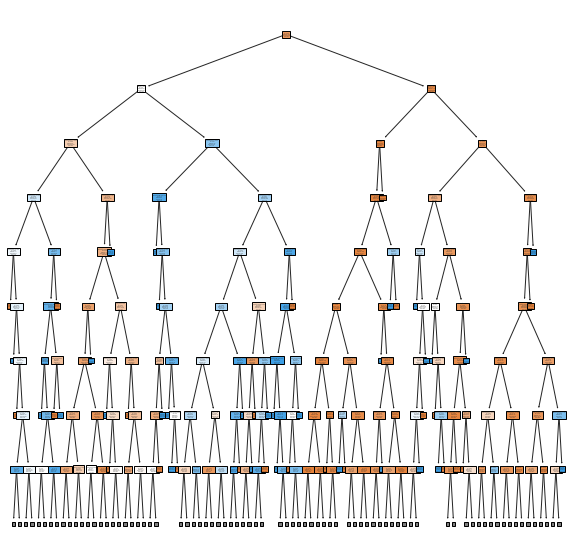

In [142]:
cols = list(encoded.columns)
cols.remove('Churn')

plt.figure(figsize=(10,10))
plot_tree(DT_model, filled=True, feature_names=cols, class_names=['No','Yes'],max_depth=8)
plt.show()

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],}
grid_search = GridSearchCV(DT_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=20),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [144]:
grid_search.best_params_

{'min_samples_leaf': 1}

Random Forest

In [145]:
RF_model = RandomForestClassifier(n_estimators=10)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_tets)

Decision Tree Regression modeli uzrening qiymatlari: 0.9337944664031621


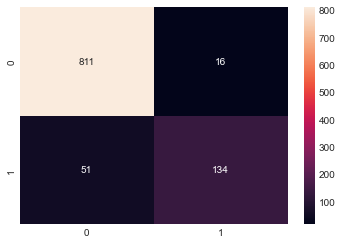

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       827
           1       0.89      0.72      0.80       185

    accuracy                           0.93      1012
   macro avg       0.92      0.85      0.88      1012
weighted avg       0.93      0.93      0.93      1012



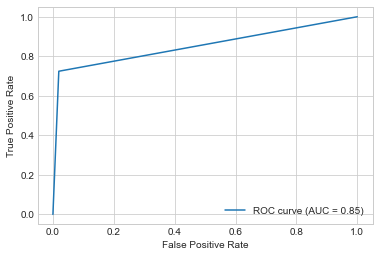

In [146]:
print(f"Decision Tree Regression modeli uzrening qiymatlari: {metrics.accuracy_score(y_test, y_pred)}")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

print(f"Classification report: \n{metrics.classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGboost

In [147]:
# XGBoost
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_tets)

c:\Users\my\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Decision Tree Regression modeli uzrening qiymatlari: 0.9367588932806324


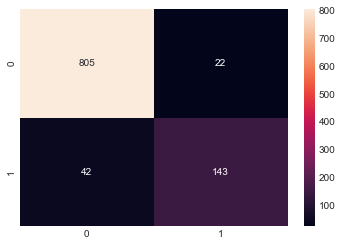

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       827
           1       0.87      0.77      0.82       185

    accuracy                           0.94      1012
   macro avg       0.91      0.87      0.89      1012
weighted avg       0.94      0.94      0.94      1012



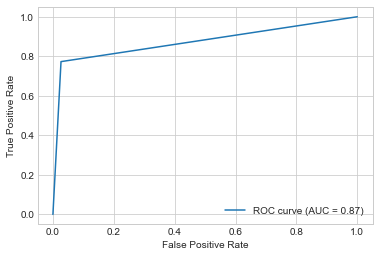

In [148]:
print(f"Decision Tree Regression modeli uzrening qiymatlari: {metrics.accuracy_score(y_test, y_pred)}")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

print(f"Classification report: \n{metrics.classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()